In [1]:
import numpy as np
from qiskit import *
%matplotlib inline
shots = 8192

# problem Bersteina-Vaziraniego
Zdefiniowana funkcja z założonym parametrem a. 

Mamy daną funkcję nie znając parametru a. Ile razy musimy ją uruchomić aby wyznaczyć ten parametr?

## bramka Uf obliczająca funkcję f(x, a)
a0 = 0, a1 = 1, a2 = 0, a3 = 1, a4 =1

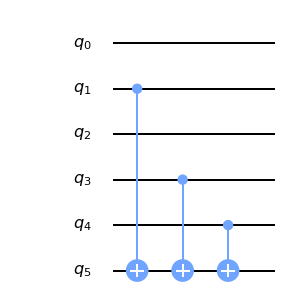

In [2]:
circ = QuantumCircuit(6)
circ.cx(1,5)
circ.cx(3,5)
circ.cx(4,5)
circ.draw()

## rozwiązanie klasyczne
Musimy uruchomić funkcję, tyle razy ile mamy bitów, dla x w postaci masek z jedną 1.
Kolejne wartości a będa się pojawiać na wyjściu q5.

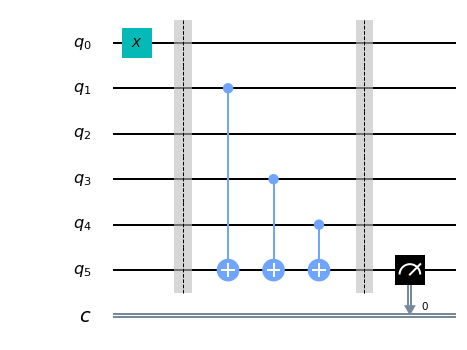

In [3]:
circ = QuantumCircuit(6, 1)
circ.x(0)
circ.barrier()
circ.cx(1,5)
circ.cx(3,5)
circ.cx(4,5)
circ.barrier()
circ.measure(5, 0)
circ.draw()

otrzymany wynik to wartość a0

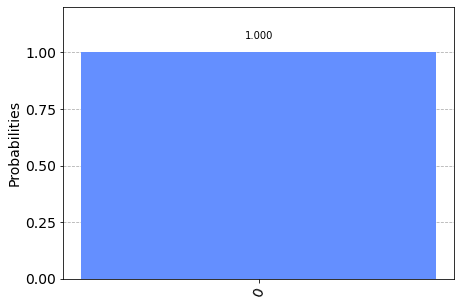

In [4]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(circ, backend_sim, shots=shots)
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
from qiskit.visualization import plot_histogram
plot_histogram(counts)

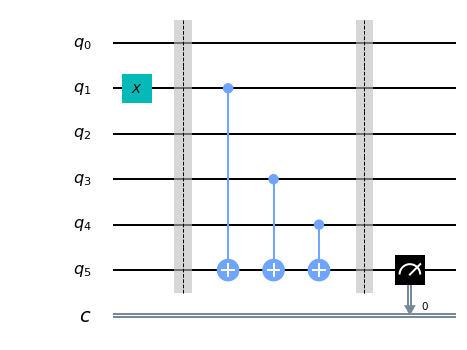

In [5]:
circ = QuantumCircuit(6, 1)
circ.x(1)
circ.barrier()
circ.cx(1,5)
circ.cx(3,5)
circ.cx(4,5)
circ.barrier()
circ.measure(5, 0)
circ.draw()

otrzymany wynik to wartość a1

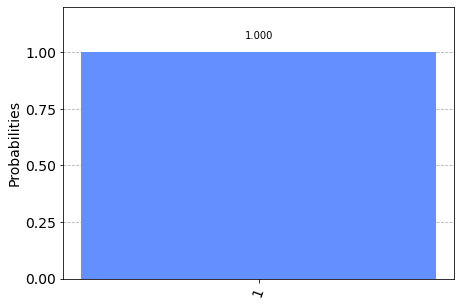

In [6]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(circ, backend_sim, shots=shots)
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
from qiskit.visualization import plot_histogram
plot_histogram(counts)

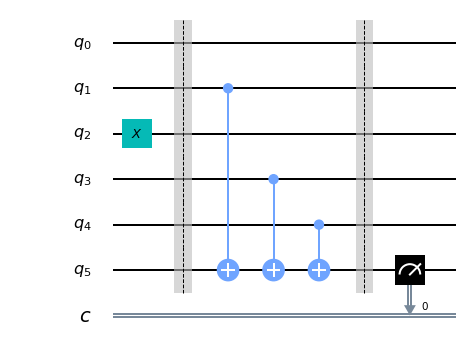

In [7]:
circ = QuantumCircuit(6, 1)
circ.x(2)
circ.barrier()
circ.cx(1,5)
circ.cx(3,5)
circ.cx(4,5)
circ.barrier()
circ.measure(5, 0)
circ.draw()

otrzymany wynik to wartość a2

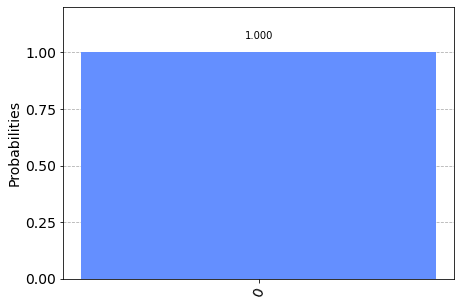

In [8]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(circ, backend_sim, shots=shots)
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
from qiskit.visualization import plot_histogram
plot_histogram(counts)

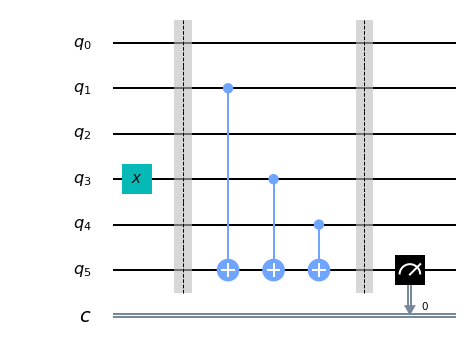

In [9]:
circ = QuantumCircuit(6, 1)
circ.x(3)
circ.barrier()
circ.cx(1,5)
circ.cx(3,5)
circ.cx(4,5)
circ.barrier()
circ.measure(5, 0)
circ.draw()

otrzymany wynik to wartość a3

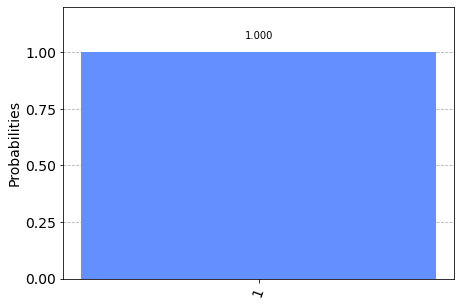

In [10]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(circ, backend_sim, shots=shots)
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
from qiskit.visualization import plot_histogram
plot_histogram(counts)

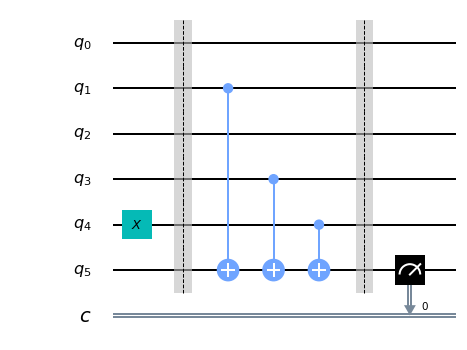

In [11]:
circ = QuantumCircuit(6, 1)
circ.x(4)
circ.barrier()
circ.cx(1,5)
circ.cx(3,5)
circ.cx(4,5)
circ.barrier()
circ.measure(5, 0)
circ.draw()

otrzymany wynik to wartość a4

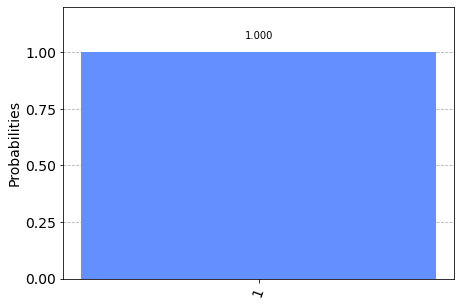

In [12]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(circ, backend_sim, shots=shots)
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
from qiskit.visualization import plot_histogram
plot_histogram(counts)

## rozwiązanie kwantowe
Funkcję "obkładamy Hadamardami".
Musimy uruchomić ją tylko raz. Wynik pojawi się na rejestrze wejściowym (q0 - q4).

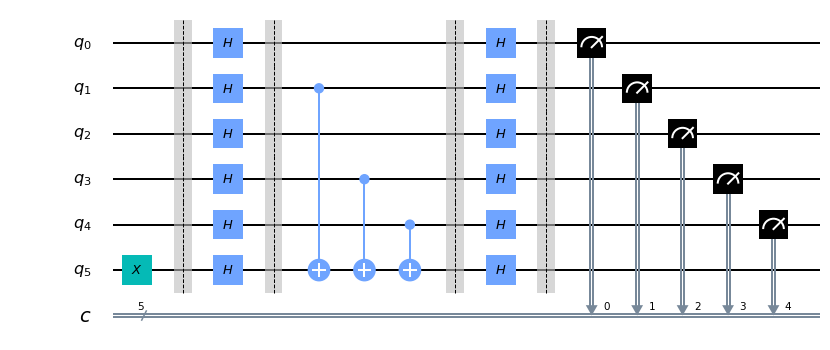

In [13]:
circ = QuantumCircuit(6, 5)
circ.x(5)
circ.barrier()
for i in range(0,6):
    circ.h(i)
circ.barrier()
circ.cx(1,5)
circ.cx(3,5)
circ.cx(4,5)
circ.barrier()
for i in range(0,6):
    circ.h(i)
circ.barrier()
for i in range(0,5):
    circ.measure(i, i)
circ.draw()

Job Status: job has successfully run


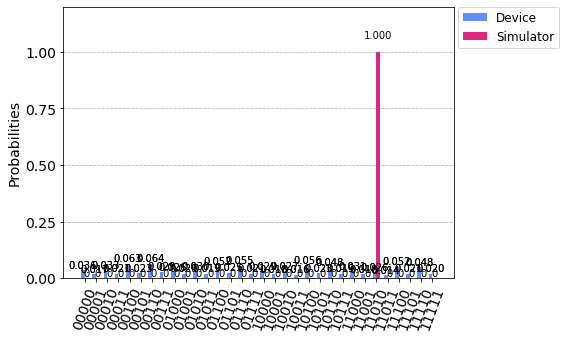

In [14]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(circ, backend_sim, shots=shots)
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)

from qiskit import IBMQ
IBMQ.load_account()
provider = IBMQ.get_provider(group='open')
# provider.backends()

backend = provider.get_backend('ibmq_16_melbourne')

from qiskit.tools.monitor import job_monitor

job_exp = execute(circ, backend=backend, shots=shots)
job_monitor(job_exp)

result_exp = job_exp.result()
counts_exp = result_exp.get_counts(circ)
from qiskit.visualization import plot_histogram
plot_histogram([counts_exp,counts], legend=['Device', 'Simulator'])

Duża ilośc kubitów i operacji na nich wykonywanych prowadzi do nieczytelnosci wyniku.
Dekoherencja spowodowana odziaływaniem świata zewnętrznego.